<a href="https://colab.research.google.com/github/kennhope13/Airline-Delay-Predict/blob/master/Airline_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
# 10000, 1, 100

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

1.THU THẬP VÀ HIỂN THỊ DỮ LIỆU

In [2]:
df = pd.read_csv("/content/sample_data/Airlines.csv")
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [4]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [5]:
#Số lượng các chuyến bay bị delay và kịp thời

In [43]:
df.drop('id', axis=1)

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,others,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,others,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


<ipython-input-44-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

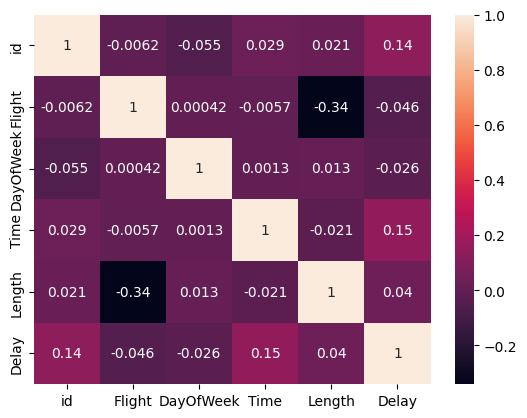

In [44]:
sns.heatmap(df.corr(), annot=True)

<Axes: title={'center': 'Count of Delay'}, xlabel='Delay', ylabel='count'>

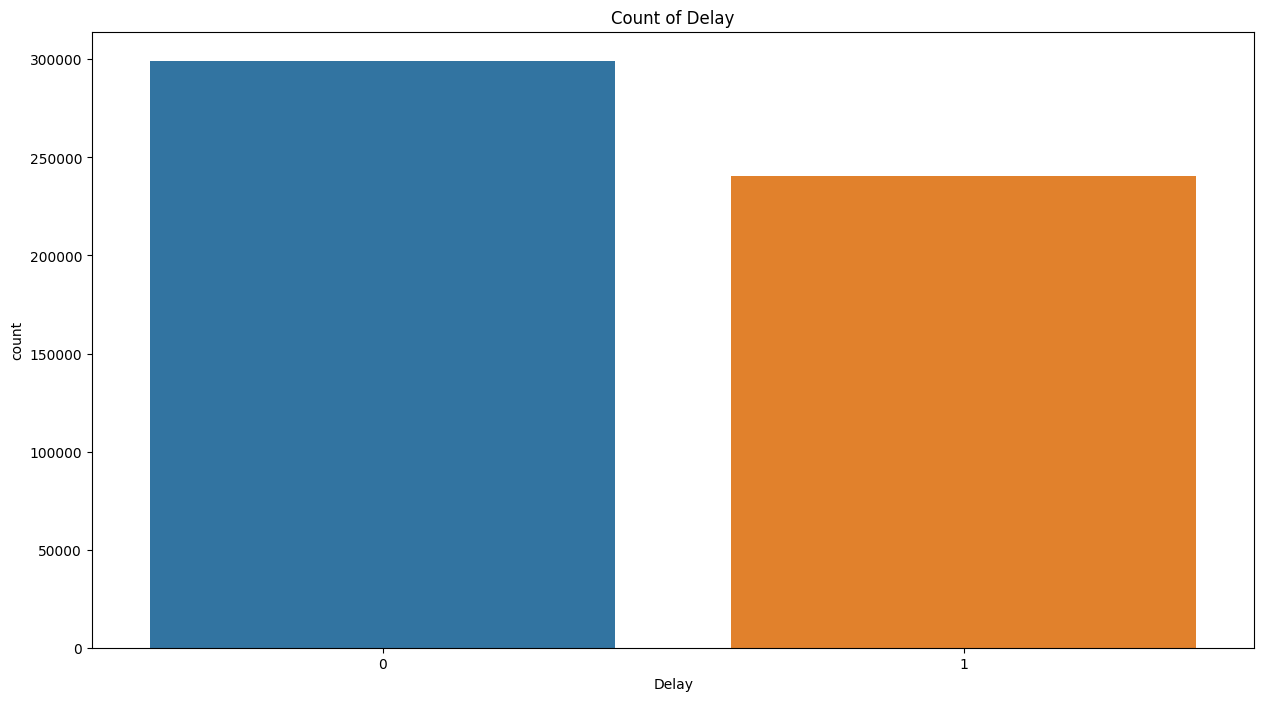

In [7]:
plt.figure(figsize=(15,8))
plt.title('Count of Delay')
sns.countplot(data=df, x='Delay')

<Axes: xlabel='Airline', ylabel='count'>

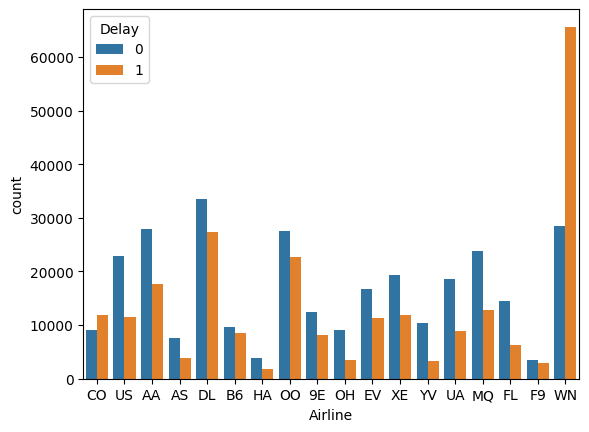

In [8]:
sns.countplot(data=df, x='Airline', hue='Delay')

In [9]:
#Hãng hàng không WN chiếm 17%
#Hãng hàng không DL chiếm 11%
#Các hãng hàng không khác chiếm 71%

In [10]:
#

<Axes: xlabel='DayOfWeek', ylabel='count'>

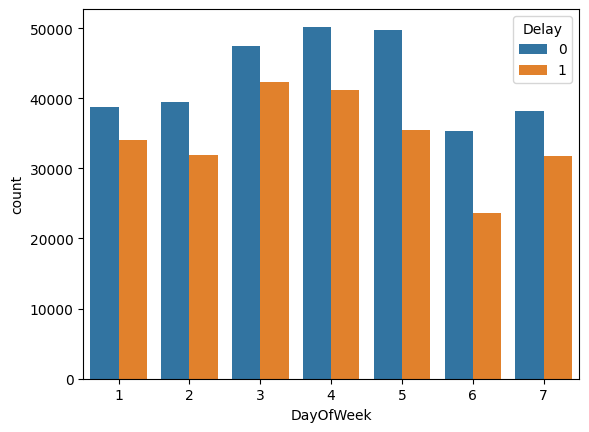

In [11]:
sns.countplot(data=df, x='DayOfWeek', hue='Delay')

In [12]:
#Thứ 3-4-5 là thứ có mật độ máy bay bị trễ nhất
#Thứ 6 không bị trễ

In [13]:
airfrom = df['AirportFrom'].value_counts()
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

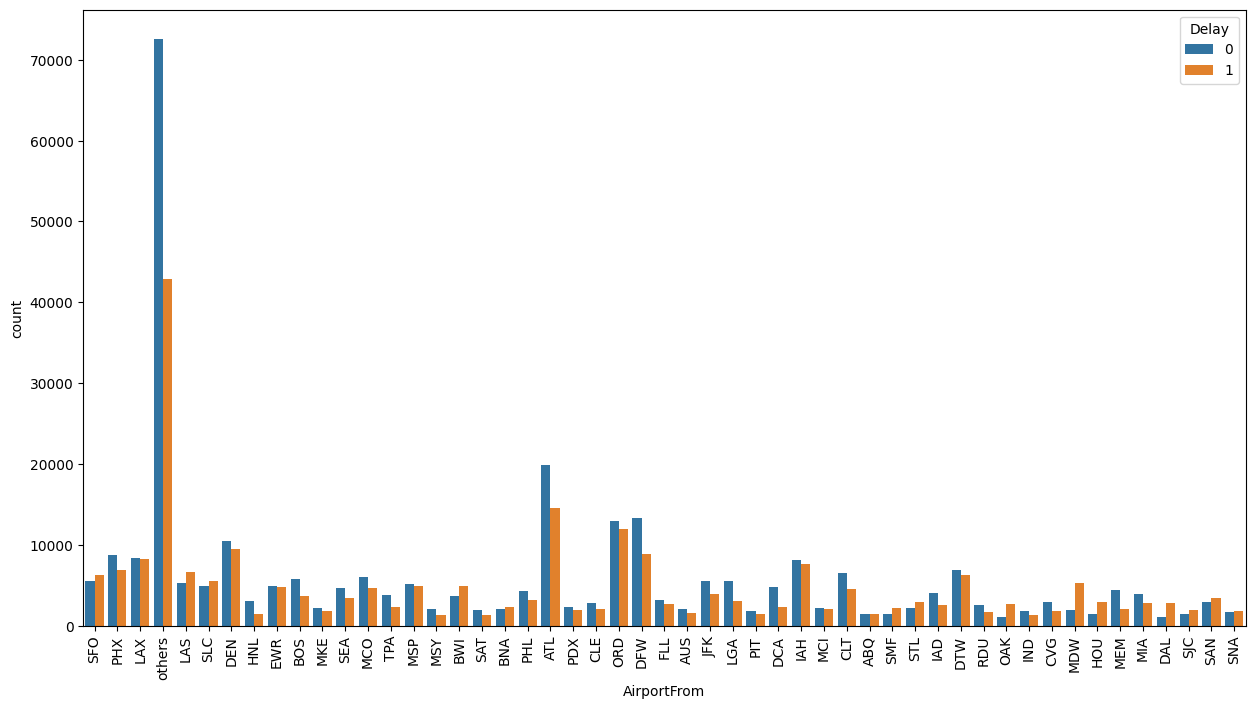

In [14]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.show()

In [15]:
#Sân bay từ:
#ATL chiếm 6%
#ORD chiếm 5%
#orther(480112) chiếm 89%

In [16]:
airto = df['AirportTo'].value_counts()
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')


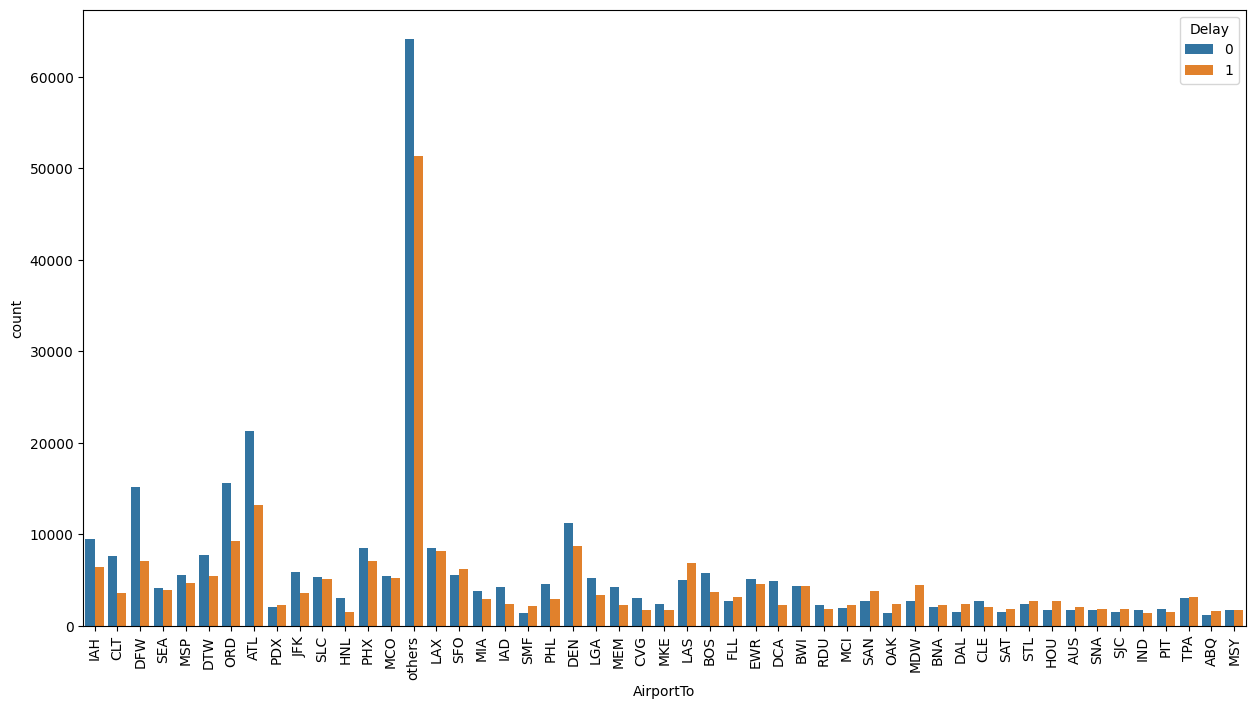

In [17]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.show()


In [18]:
#Sân bay đến:
#ATL chiếm 6%
#ORD chiếm 5%
#Other(480072) chiếm 89%

2.TIỀN SỬ LÝ DỮ LIỆU

In [19]:
# Kiểm tra dữ liệu bị thiếu
df.isna().sum()


id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [20]:
# Kiểm tra dữ liệu bị trùng
df.duplicated().sum()

0

3.TẬP HUẤN DỮ LIỆU

In [21]:
# X = df.drop('Delay', axis=1)
# y = df['Delay']

In [42]:
X_cat = df[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
X_num = df.drop(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], axis=1)

In [45]:
X_num

,id,Flight,Time,Length
0,1,269,15,205
1,2,1558,15,222
2,3,2400,20,165
3,4,2466,20,195
4,5,108,30,202
...,...,...,...,...
539378,539379,178,1439,326
539379,539380,398,1439,305
539380,539381,609,1439,255
539381,539382,78,1439,313


In [24]:
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #chuẩn hóa dữ liệu trong thống kê
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Delay']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

4.XÂY DỰNG MÔ HÌNH

DECISIONTREE

In [27]:
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=3)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.6279702128974446


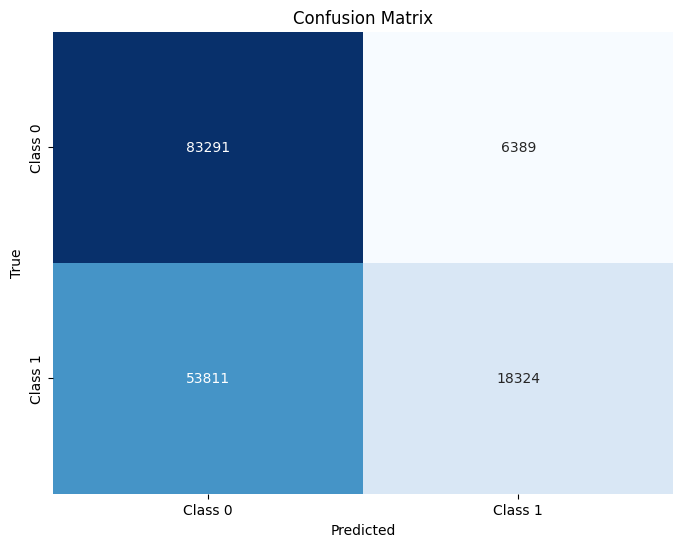

In [28]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

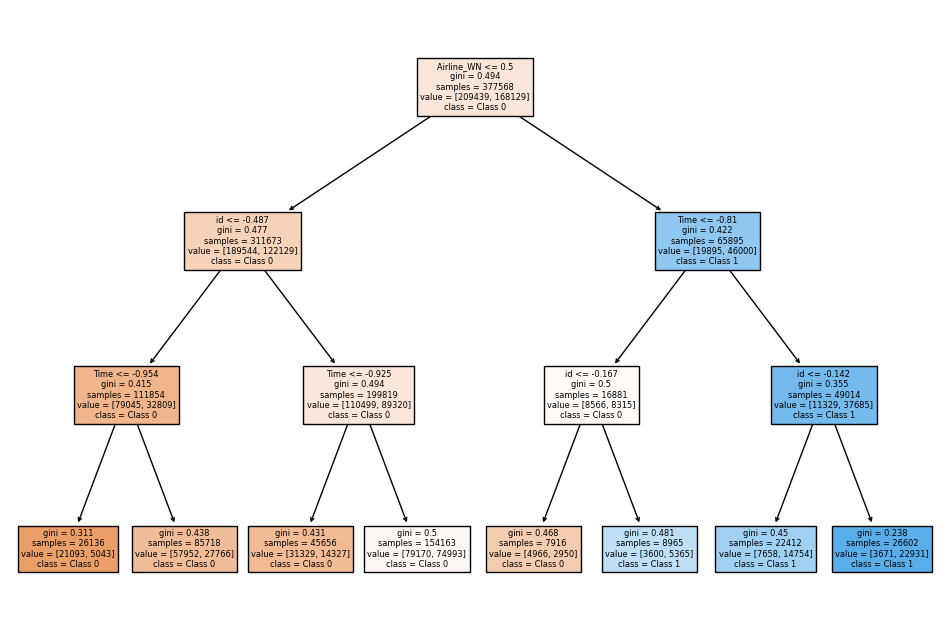

In [29]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()

In [30]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(1, 10)

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 1: Test Score = 0.6228841578345642
Max Depth = 2: Test Score = 0.6234279887525879
Max Depth = 3: Test Score = 0.6279702128974446
Max Depth = 4: Test Score = 0.6356332849241417
Max Depth = 5: Test Score = 0.645150325989556
Max Depth = 6: Test Score = 0.651206624849365
Max Depth = 7: Test Score = 0.6543521923183883
Max Depth = 8: Test Score = 0.6590489138831381
Max Depth = 9: Test Score = 0.6601983746871427
Best Max Depth = 9: Best Test Score = 0.6601983746871427


In [31]:
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=9)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.6601983746871427


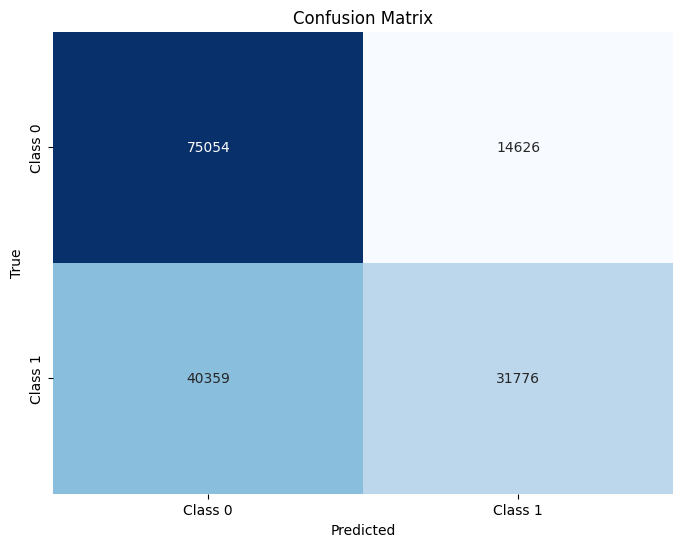

In [32]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

2.RANDOM FOREST

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = pd.get_dummies(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
rf.fit(X_train, y_train)

# Dự đoán nhãn cho tập dữ liệu test
predictions = rf.predict(X_test)

# Đánh giá độ chính xác và hiển thị báo cáo
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6903130117727034


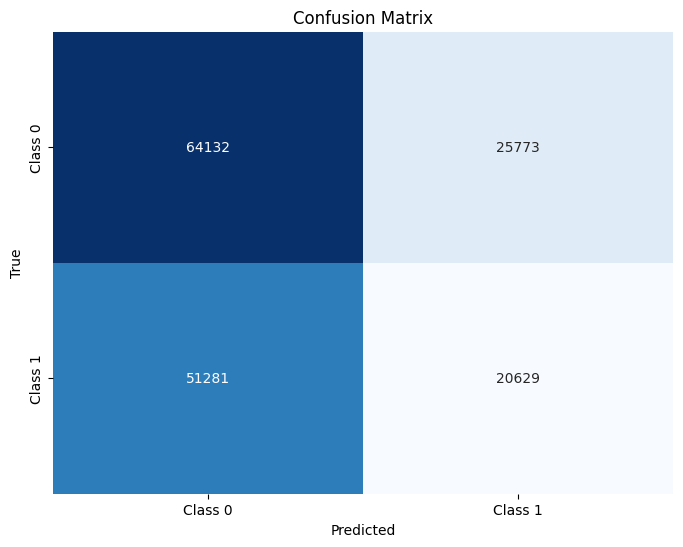

In [34]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

3.NAIVE BAYES

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Naive Bayes
model = GaussianNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# In kết quả
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6051521640386737
Confusion Matrix:
[[43317 16562]
 [26033 21965]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.67     59879
           1       0.57      0.46      0.51     47998

    accuracy                           0.61    107877
   macro avg       0.60      0.59      0.59    107877
weighted avg       0.60      0.61      0.60    107877



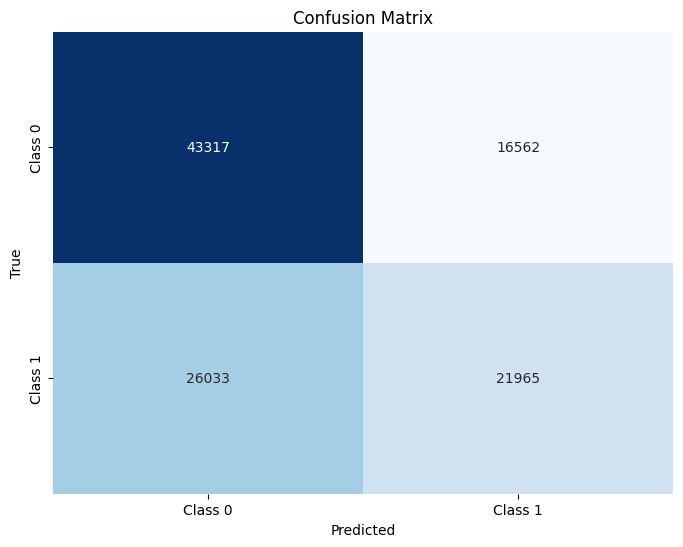

In [36]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

4.LOGISTIC REGRESSION

In [37]:
# Tạo và huấn luyện mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# In báo cáo chi tiết
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.77      0.71     59879
           1       0.64      0.51      0.57     47998

    accuracy                           0.65    107877
   macro avg       0.65      0.64      0.64    107877
weighted avg       0.65      0.65      0.65    107877



In [38]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f'Độ chính xác: {accuracy}')

Độ chính xác: 0.6525023869777618


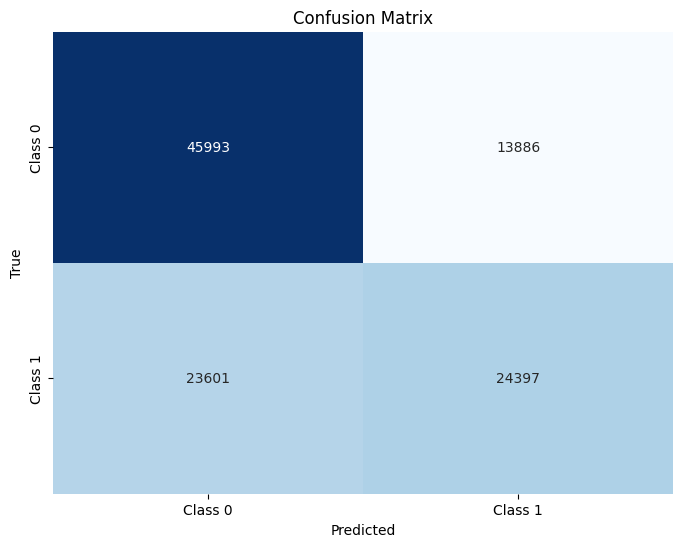

In [39]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# names = ['DT','RF','GB']
# values = [accuracy,accuracy,accuracy,accuracy]
# print(values)
# f = plt.figure(figsize=(15,3),num=1)
# plt.subplot(131)
# plt.ylim(0,1)
# plt.bar(names,values)

5.KẾT LUẬN

Độ chính xác của thuật toán Decisiontree:0.6601983746871427

Độ chính xác của thuật toán RandomForest: 0.6903130117727034

Độ chính xác của thuật toán Naive Bayes: 0.6051521640386737

Độ chính xác của thuật toán LogisticRegression:0.6525023869777618

In [41]:
df.shape

(539383, 9)

Vậy với tập dữ liệu Airline Delay này thì thuật toán RandomForest là thuật toán có độ chính xác nhất.